# Importing Libraries

In [52]:
pip install scikit-learn-intelex


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_regression, f_regression, mutual_info_classif, f_classif
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Data Loading

In [23]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# EDA

In [24]:
train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [25]:
test.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


In [26]:
train[train['RecipeNumber']==50]

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
29,157,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_165463,u_1oKVqZrSpbwLHDizQvPNcD5WJGY,gratefulservant_AZ,1,1622717131,0,0,0,5,100,I discovered this recipe while on vacation in ...
62,13,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_385800,u_1oKVZbsxi9Xvwi48Dv2eT6JuFXp,cynandtom,80,1622718272,0,4,0,5,329,Fantastic flavorful chicken! Hubby and I both...
301,90,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_373610,u_1oKbeuh9X83CqFGSJQ9GpUq5bD3,bonmalldiva,1,1622718207,0,0,0,3,100,Would this work as well with Chicken Breasts?
392,134,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_363155,u_1oKW8JtaATPFmPnsoe6TFKPsvE7,blueyedjla,1,1622718148,0,0,0,5,100,We have made this recipe many times because it...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13214,132,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_373520,u_1oKVsNNkZp4JBALtlf2UiaAw2SO,jchockley,1,1622718204,0,0,0,4,100,Would make a good grilled chicken sandwich (us...
13452,117,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_363627,u_1oKXt9YXqddVCZp83WBBBA3I9mG,tinabush,1,1622718158,0,0,0,5,100,We like this chicken the way the original reci...
13462,64,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_108751,u_1oKVa4my2LXJ25e5Bd6sxZC37xq,wasoongu,1,1622716889,0,0,0,5,100,A family favorite! Marinade for a full 24 hour...
13574,41,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_210501,u_1oKY6MASythhIbtL5nRN5I7EPKe,WendallAnderson,1,1622717344,0,6,0,5,374,I use sweet baby Ray&#39;s BBQ sauce instead o...


In [27]:
train.shape

(13636, 15)

In [28]:
train.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review'],
      dtype='object')

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [30]:
train.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


In [31]:
numerical_columns = [col for col in train.columns if train[col].dtype !="object"]
categorical_columns = [col for col in train.columns if train[col].dtype == "object"]

print(f' There are {len(numerical_columns)} numerical columns')
print(f' There are {len(categorical_columns)} categorical columns')

 There are 10 numerical columns
 There are 5 categorical columns


In [32]:
for i in train.columns:
    print(f'{i} has {train[i].nunique()} values')

ID has 701 values
RecipeNumber has 100 values
RecipeCode has 100 values
RecipeName has 100 values
CommentID has 13636 values
UserID has 10783 values
UserName has 10620 values
UserReputation has 20 values
CreationTimestamp has 2422 values
ReplyCount has 4 values
ThumbsUpCount has 57 values
ThumbsDownCount has 51 values
Rating has 6 values
BestScore has 525 values
Recipe_Review has 13370 values


In [33]:
for i in train.columns:
    print(f"{i} has {train[i].value_counts()} different values")
    print("---------------------------------------")

ID has ID
19     85
25     83
90     82
69     82
71     81
       ..
552     1
706     1
572     1
608     1
675     1
Name: count, Length: 701, dtype: int64 different values
---------------------------------------
RecipeNumber has RecipeNumber
3     553
1     483
2     372
9     313
13    307
     ... 
54     68
97     65
91     64
72     64
61     19
Name: count, Length: 100, dtype: int64 different values
---------------------------------------
RecipeCode has RecipeCode
2832     553
14299    483
3309     372
42083    313
32480    307
        ... 
35766     68
34347     65
3683      64
1821      64
17022     19
Name: count, Length: 100, dtype: int64 different values
---------------------------------------
RecipeName has RecipeName
Cheeseburger Soup             553
Creamy White Chili            483
Best Ever Banana Bread        372
Enchilada Casser-Ole!         313
Basic Homemade Bread          307
                             ... 
Cheeseburger Paradise Soup     68
Lime Chicken Tacos 

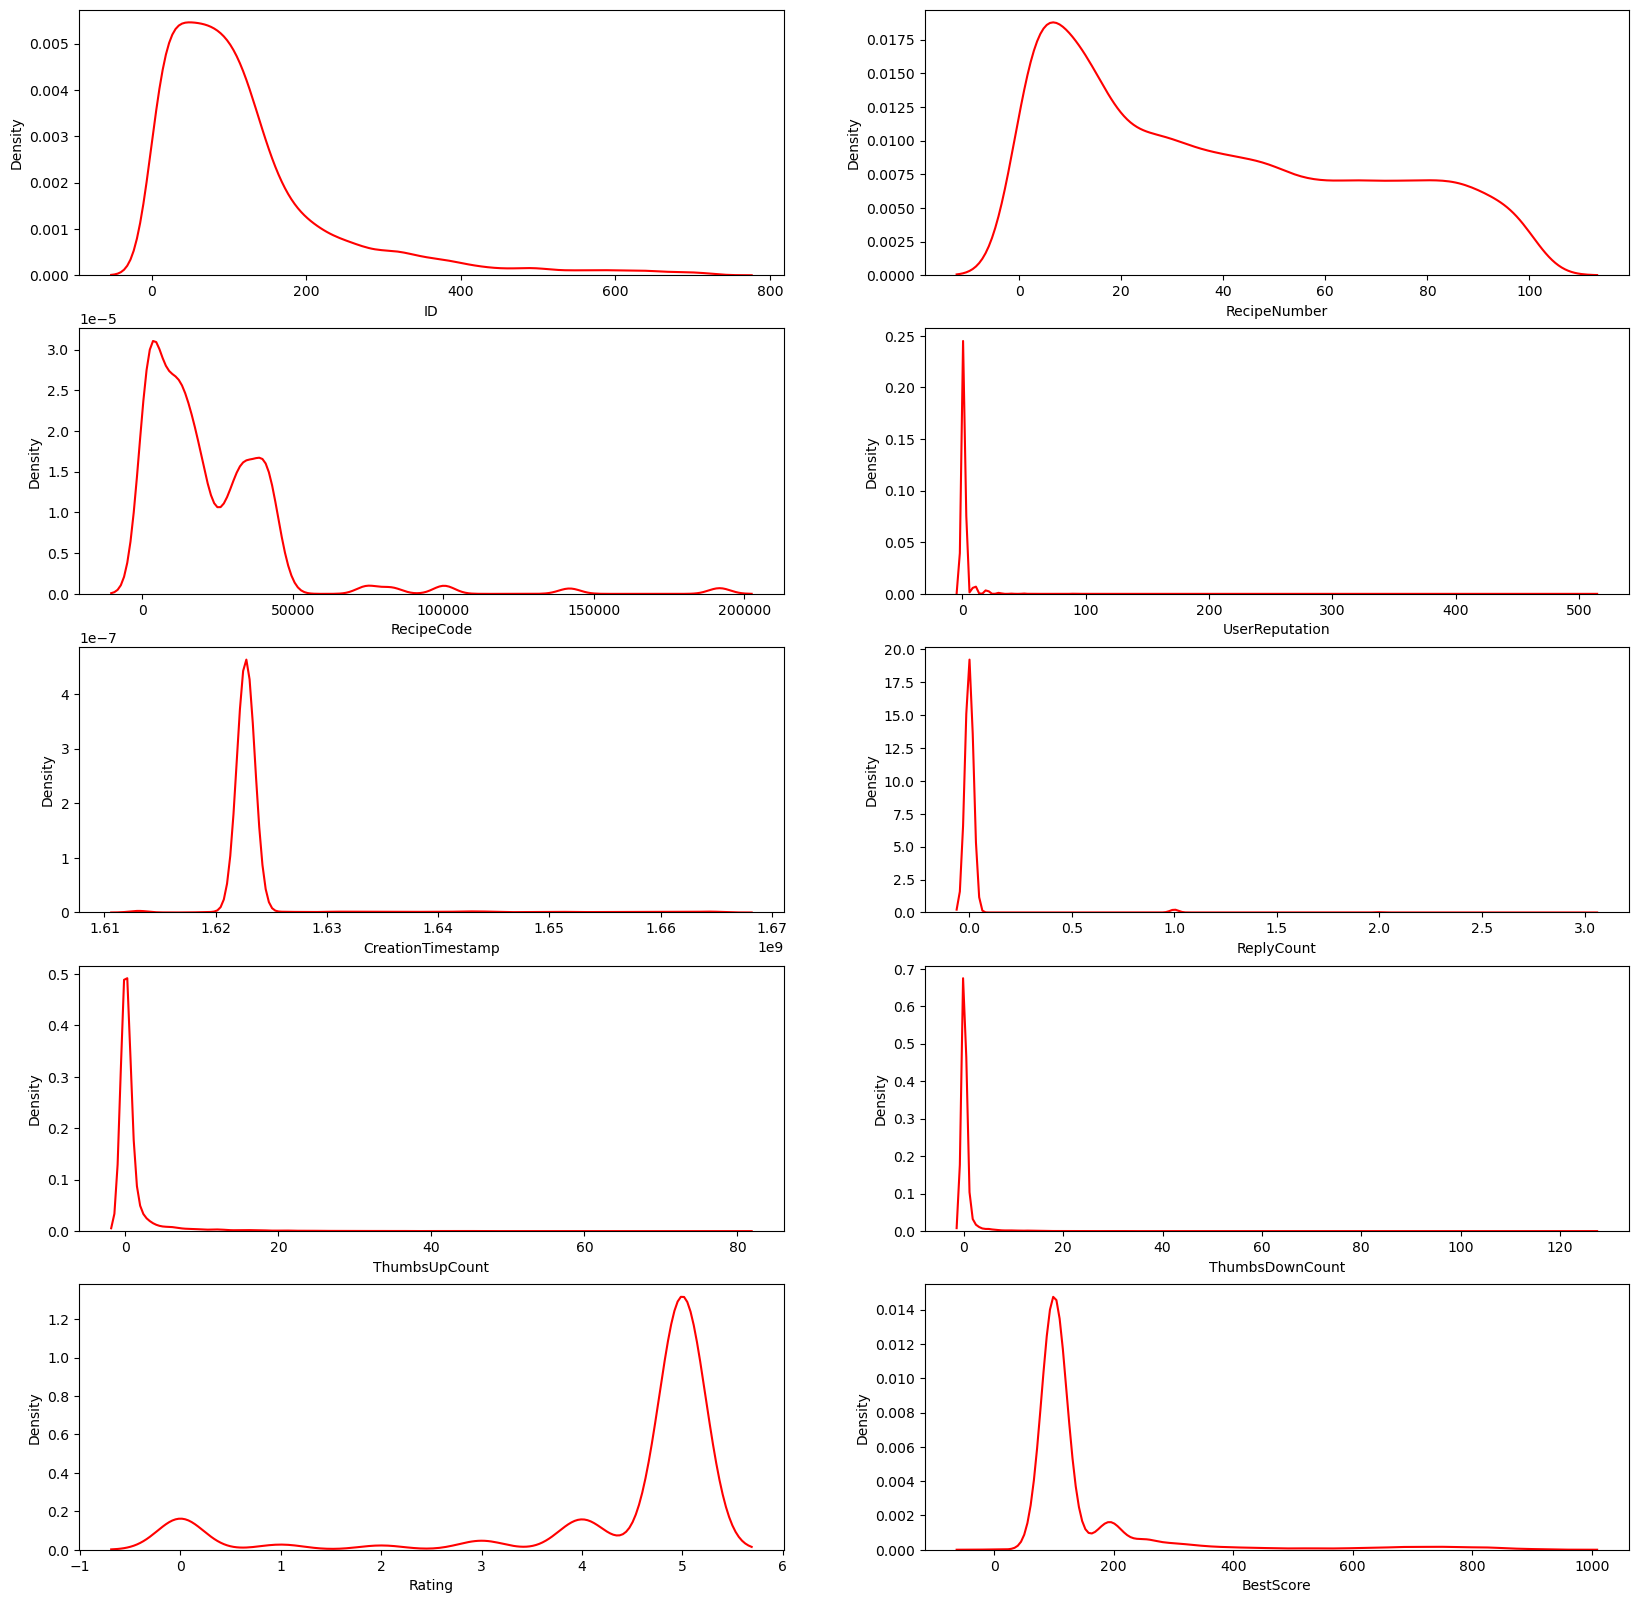

In [34]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,20))
plt.title('Univeriate Analysis for numerical columns', fontsize=20)

num_row = 5
num_col = 2

for i in range(0, len(numerical_columns)):
    plt.subplot(num_row, num_col, i+1)
    sns.kdeplot(x=train[numerical_columns[i]], color='red')
    plt.xlabel(numerical_columns[i])

In [35]:
for i in categorical_columns:
    print(train[i].nunique())

100
13636
10783
10620
13370


In [36]:
chi_test=[]
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(train['Rating'],train[i]))[1] < 0.05:
        chi_test.append("Reject the null hypothesis")
    else:
        chi_test.append("Failed to reject null hypothesis")
        
result = pd.DataFrame(data=[categorical_columns,chi_test]).T
result.colums = ["Feature Name", "Results"]
result

,0,1
0,RecipeName,Reject the null hypothesis
1,CommentID,Failed to reject null hypothesis
2,UserID,Reject the null hypothesis
3,UserName,Reject the null hypothesis
4,Recipe_Review,Reject the null hypothesis


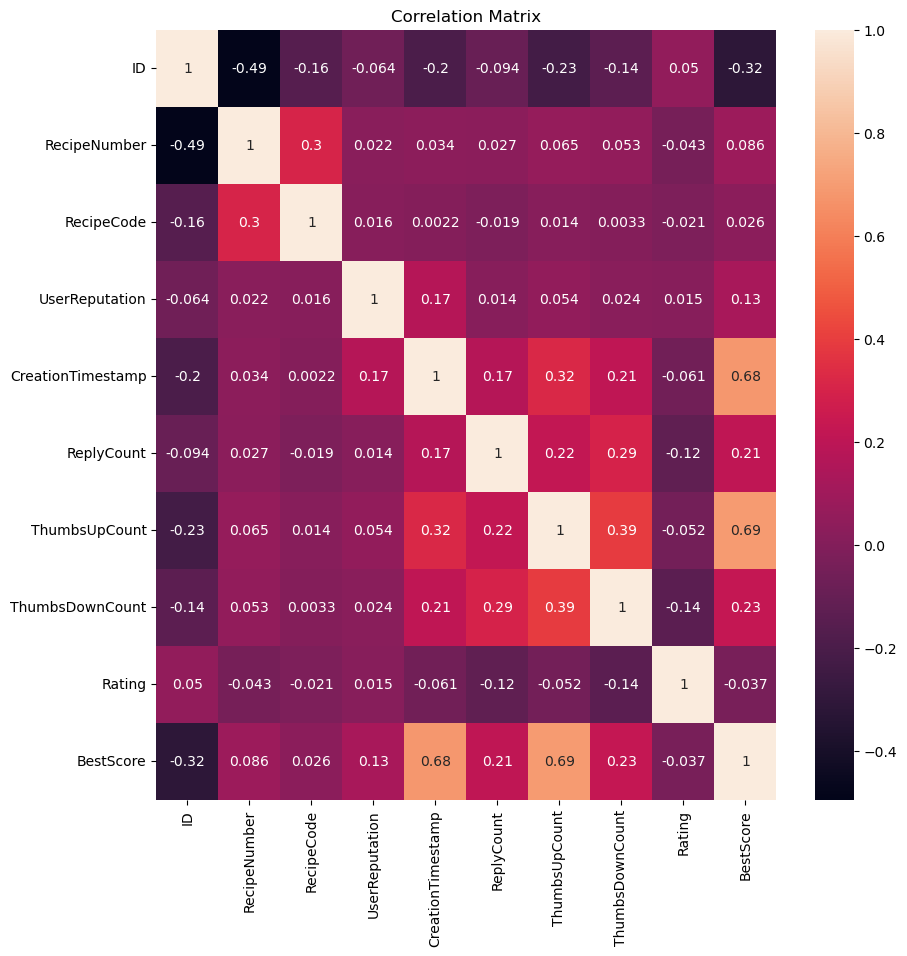

In [37]:
corr_mat = train.corr(numeric_only=True)
plt.figure(figsize=(10,10))
mask = np.triu(corr_mat)
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [38]:
train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


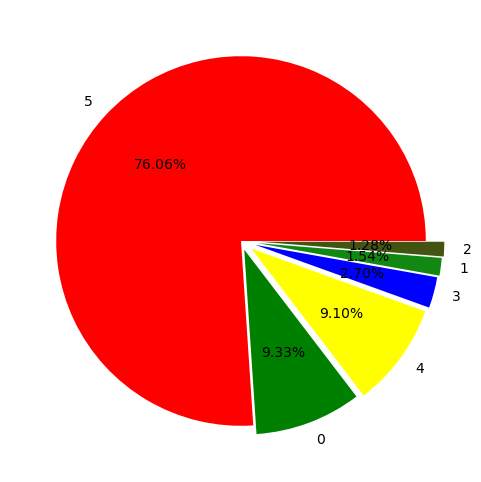

In [39]:
percentage = train.Rating.value_counts(normalize=True)*100
labels = [5,0,4,3,1,2]
explode = (0,0.05,0.07,0.08,0.09,0.1)
colors = ['red', 'green', 'yellow', 'blue', '#118811', '#435311']

fig, ax = plt.subplots(figsize=(15, 6))
ax.pie(percentage, labels=labels, colors=colors, explode=explode, autopct='%1.2f%%')
plt.show()

In [40]:
train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [41]:
train = train.drop(columns=['RecipeCode','RecipeName','CommentID','CreationTimestamp','UserID','UserName','Recipe_Review'])
test = test.drop(columns=['RecipeCode','RecipeName','CommentID','CreationTimestamp','UserID','UserName','Recipe_Review'])

In [42]:
test.isnull().sum()

ID                 0
RecipeNumber       0
UserReputation     0
ReplyCount         0
ThumbsUpCount      0
ThumbsDownCount    0
BestScore          0
dtype: int64

In [43]:
X = train.drop(columns=['Rating'])
y = train['Rating']

# Preprocessing

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)
X_train.shape, X_test.shape

((10908, 7), (2728, 7))

In [45]:
X_train.head()

,ID,RecipeNumber,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
3717,62,47,1,0,0,0,100
12430,109,12,1,0,0,0,100
532,76,41,1,0,0,0,100
10683,23,13,1,0,13,39,533
11196,122,98,1,0,0,0,100


In [46]:
from sklearn.metrics import accuracy_score

# Model Training

In [47]:
lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)
ypred_train = lr_model.predict(X_train)
ypred_test = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, ypred_test)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.7569648093841642


In [54]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.7576979472140762


In [55]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.6367302052785924


In [57]:
pip install xgboost==1.4.2


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.7/166.7 MB 29.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [59]:
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=5, eval_metric='merror')
model_xgb = BaggingClassifier(base_estimator=xgb_classifier, n_estimators=50, random_state=42)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, pred_xgb)
print("Bagging Accuracy with XGBoost:", accuracy_xgb)

Bagging Accuracy with XGBoost: 0.7624633431085044
